# Required imports

In [1]:
# Required imports
from collections import namedtuple
import numpy as np
import datetime
from netCDF4 import Dataset
import configparser
from matplotlib import pyplot as plt
from cftime import num2pydate
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pylag.regrid import regridder
from pylag.processing.ncview import Viewer
from pylag.processing.plot import FVCOMPlotter
from pylag.processing.plot import create_figure
from pylag.processing.utils import get_grid_bands

# Release one along the cord

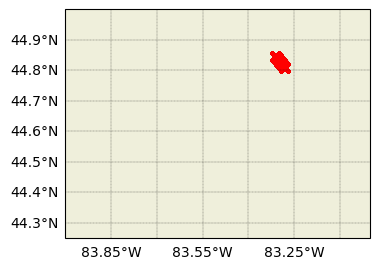

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from pylag.processing.coordinate import utm_from_lonlat, lonlat_from_utm
from pylag.processing.release_zone import create_release_zones_along_cord
from pylag.processing.plot import create_figure, colourmap
from pylag.processing.plot import FVCOMPlotter
from pylag.processing.release_zone import create_release_zone
from pylag.processing.input import create_initial_positions_file_multi_group

import os
data_dir = '/home/samin/data/FVCOME_OUTPUT/Gldata'.format(os.environ['HOME'])
# Keep a copy of the cwd
cwd = os.getcwd()
# Create run directory
simulation_dir = '/home/samin/data/FVCOME_OUTPUT/simulations/horon'.format(cwd)
try:
    os.makedirs(simulation_dir)
except FileExistsError:
    pass

def plot_release_zone_locations(release_zones, extents):

    # Create figure
    font_size = 10
    projection = ccrs.PlateCarree()
    cmap = colourmap('h_r')
    fig, ax = create_figure(figure_size=(10., 10.), font_size=font_size,
                            projection=ccrs.PlateCarree(), bg_color = 'gray')

    # Plot the location of particles in each release zone
    for zone in release_zones:
        lons, lats = (zone.get_eastings(), zone.get_northings())
        ax.scatter(lons, lats, zorder=2, transform=projection, marker='x', color='r')

    # Tidy up the plot
    ax.set_extent(extents, projection)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face',
                                                facecolor=cfeature.COLORS['land']))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                                edgecolor='face',
                                                facecolor=cfeature.COLORS['water']))
    ax.coastlines(resolution='10m')
    gl = ax.gridlines(linewidth=0.2, draw_labels=True, linestyle='--', color='k')
    gl.xlabel_style = {'fontsize': font_size}
    gl.ylabel_style = {'fontsize': font_size}
    gl.top_labels=False
    gl.right_labels=False
    gl.bottom_labels=True
    gl.left_labels=True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    

# Define some common properties for release zones
n_particles = 1000          # Number of particles per release zone
radius = 0.001               # Release zone radius (m)
depth = 0.0                  # Depth that particles will be released at
#lat = 43.7297955
#lon = 83.9448524
#lon1 = 276.71268399999997
#lat1 = 44.792624

#lon2 = 276.7169553
#lat2 = 44.77363

#location along  black river, Lake Huron
lon1 = 276.6876686
lat1 = 44.8471463

lon2 = 276.71926329999997
lat2 = 44.8082104
# Position vector of a point toward the LHS of the Tamar Estuary (lon, lat)
coords_lhs = np.array([lon1, lat1])

# Position vector of a point toward the RHS of the Tamar Estuary (lon, lat)
coords_rhs = np.array([lon2, lat2])

# Convert to UTM coordinates
#epsg_code = '32630'
#eastings, northings, _ = ([coords_lhs[0], coords_rhs[0]],
#                                         [coords_lhs[1], coords_rhs[1]],
#                                         )

# Position vectors in UTM coordinates
coords_utm_lhs = np.array([coords_lhs[0], coords_lhs[1]])
coords_utm_rhs = np.array([coords_rhs[0], coords_rhs[1]])
# Create input sub-directory

input_dir =  '{}/input'.format(simulation_dir)
try:
    os.makedirs(input_dir)
except FileExistsError:
    pass

# Output filename
file_name = '{}/initial_positions_along_cord.dat'.format(input_dir)

# Create release zones
release_zones = create_release_zones_along_cord(coords_utm_lhs, coords_utm_rhs, radius=radius,
        n_particles=n_particles, depth=depth, random=True)


create_initial_positions_file_multi_group(file_name,release_zones)
                                          
                                           

# Plot
plot_release_zone_locations(release_zones, [276, 277, 44.25, 45])

plt.show()

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from pylag.processing.release_zone import create_release_zone
from pylag.processing.coordinate import utm_from_lonlat, lonlat_from_utm
from pylag.processing.release_zone import create_release_zones_along_cord
from pylag.processing.plot import create_figure


def plot_release_zone_locations(release_zones, extents):
    """ Plot the location of particles in each release zone

    Parameters
    ----------
    release_zones : list
        List of release zones

    extents : list
        List of extents for the plot [xmin, xmax, ymin, ymax]
    """
    # Create figure
    font_size = 12
    projection = ccrs.PlateCarree()
    fig, ax = create_figure(figure_size=(20., 20.), font_size=font_size,
                            projection=projection)

    # Plot the location of particles in each release zone
    for zone in release_zones:
        lons, lats, _ = zone.get_coordinates()
        ax.scatter(lons, lats, zorder=2, transform=projection, marker='x', color='r')

    # Tidy up the plot
    ax.set_extent(extents, projection)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face',
                                                facecolor=cfeature.COLORS['land']))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                                edgecolor='face',
                                                facecolor=cfeature.COLORS['water']))
    ax.coastlines(resolution='10m')
    gl = ax.gridlines(linewidth=0.2, draw_labels=True, linestyle='--', color='k')
    gl.xlabel_style = {'fontsize': font_size}
    gl.ylabel_style = {'fontsize': font_size}
    gl.top_labels=False
    gl.right_labels=False
    gl.bottom_labels=True
    gl.left_labels=True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


# Define some common properties for release zones
n_particles = 1000           # Number of particles per release zone
radius = 400.0               # Release zone radius (m)
depth = 0.0                  # Depth that particles will be released at

# Specify that we are now working in geographic coordinates
coordinate_system = 'geographic'

# Position vector of a point toward the LHS of the Tamar Estuary (lon, lat)
coords_lhs = np.array([-4.19, 50.315])

# Position vector of a point toward the RHS of the Tamar Estuary (lon, lat)
coords_rhs = np.array([-4.11, 50.325])

# Create release zones
release_zones = create_release_zones_along_cord(coords_lhs,
                                                coords_rhs,
                                                coordinate_system=coordinate_system,
                                                radius=radius,
                                                n_particles=n_particles,
                                                depth=depth,
                                                random=True)

# Plot
plot_release_zone_locations(release_zones, [-4.3, -4.0, 50.2, 50.5])

plt.show()

TypeError: create_release_zones_along_cord() got an unexpected keyword argument 'coordinate_system'

# Create grid metrics file

In [3]:
from pylag.grid_metrics import create_fvcom_grid_metrics_file

# An example FVCOM output file
fvcom_file_name = '/home/samin/data/FVCOME_OUTPUT/Gldata/fvcome_houron_estuary_081700_0001.nc'

# The file listing the location of open boundary nodes
#obc_file_name = '/home/samin/data/FVCOME_OUTPUT/fvcom_tamar_estuary_obc.dat'
obc_file_name = '/home/samin/data/FVCOME_OUTPUT/obc.dat'
# The name of the output file
#grid_metrics_file_name = f'{input_dir}/grid_metrics_huron2.nc'
grid_metrics_file_name = f'{input_dir}/grid_metrics_huron_node3.nc'
# Generate the file
create_fvcom_grid_metrics_file(fvcom_file_name, obc_file_name = obc_file_name,
                               grid_metrics_file_name=grid_metrics_file_name)

Creating FVCOM grid metrics file /home/samin/data/FVCOME_OUTPUT/simulations/horon/input/grid_metrics_huron_node3.nc
INFO - detected longitudes greater than 180.0 in variable lon. Assuming longitude limits are in the range 0 - 360. Correcting these to be in the range -180 to 180.
INFO - detected longitudes greater than 180.0 in variable lonc. Assuming longitude limits are in the range 0 - 360. Correcting these to be in the range -180 to 180.
Grid has 51110 nodes on the open boundary


In [17]:
import configparser
config_file_name = '/home/samin/data/FVCOME_OUTPUT/confings/huron2.cfg'


cf = configparser.ConfigParser()
cf.read(config_file_name)

# Start time
print('Start time: {}'.format(cf.get('SIMULATION', 'start_datetime')))

# End time
print('End time: {}'.format(cf.get('SIMULATION', 'end_datetime')))

# Specify that this is a forward tracking experiment
print('Time direction: {}'.format(cf.get('SIMULATION', 'time_direction')))

# We will do a single run, rather than an ensemble run
print('Number of particle releases: {}'.format(cf.get('SIMULATION', 'number_of_particle_releases')))

# Use depth restoring, and restore particle depths to the ocean surface
print('Use depth restoring: {}'.format(cf.get('SIMULATION', 'depth_restoring')))
print('Restore particles to a depth of: {} m'.format(cf.get('SIMULATION', 'fixed_depth')))

# Specify that we are working with FVCOM in cartesian coordinates
print('Model name: {}'.format(cf.get('OCEAN_DATA', 'name')))
print('Coordinate system: {}'.format(cf.get('SIMULATION', 'coordinate_system')))

# Set the location of the grid metrics and input files
print('Data directory: {}'.format(cf.get('OCEAN_DATA', 'data_dir')))
print('Path to grid metrics file: {}'.format(cf.get('OCEAN_DATA', 'grid_metrics_file')))
print('File name stem of input files: {}'.format(cf.get('OCEAN_DATA', 'data_file_stem')))
      
# Do an advection only run using a RK$ intergration scheme 
print('Numerical method: {}'.format(cf.get('NUMERICS', 'num_method')))
print('Iterative method: {}'.format(cf.get('NUMERICS', 'iterative_method')))

Start time: 2023-08-16 15:00:00
End time: 2023-08-21 00:00:00
Time direction: forward
Number of particle releases: 10
Use depth restoring: True
Restore particles to a depth of: 0.0 m
Model name: FVCOM
Coordinate system: geographic
Data directory: /home/samin/data/FVCOME_OUTPUT/Gldata
Path to grid metrics file: /home/samin/data/FVCOME_OUTPUT/simulations/horon/input/grid_metrics_huron_node3.nc
File name stem of input files: fvcome_houron_estuary_08
Numerical method: standard
Iterative method: Adv_RK4_3D


In [18]:
cf.set('OCEAN_DATA', 'data_dir', data_dir)
cf.set('OCEAN_DATA', 'grid_metrics_file', grid_metrics_file_name)

# Save a copy in the simulation directory
with open(f"{simulation_dir}/pylag.cfg", 'w') as config:
    cf.write(config)

In [19]:
# Change to the run directory
os.chdir(f"{simulation_dir}")

# Run the model
!{"python -m pylag.main -c pylag.cfg"}

# Return to the cwd
os.chdir(cwd)


Starting ensemble member 1 ...
Progress:
100% |###########################################|

Starting ensemble member 2 ...
Progress:
100% |###########################################|

Starting ensemble member 3 ...
Progress:
100% |###########################################|

Starting ensemble member 4 ...
Progress:
100% |###########################################|

Starting ensemble member 5 ...
Progress:
100% |###########################################|

Starting ensemble member 6 ...
Progress:
100% |###########################################|

Starting ensemble member 7 ...
Progress:
100% |###########################################|

Starting ensemble member 8 ...
Progress:
100% |###########################################|

Starting ensemble member 9 ...
Progress:
100% |###########################################|

Starting ensemble member 10 ...
Progress:
100% |###########################################|


ValueError: real_datetime(2023, 8, 17, 15, 0) is not in list

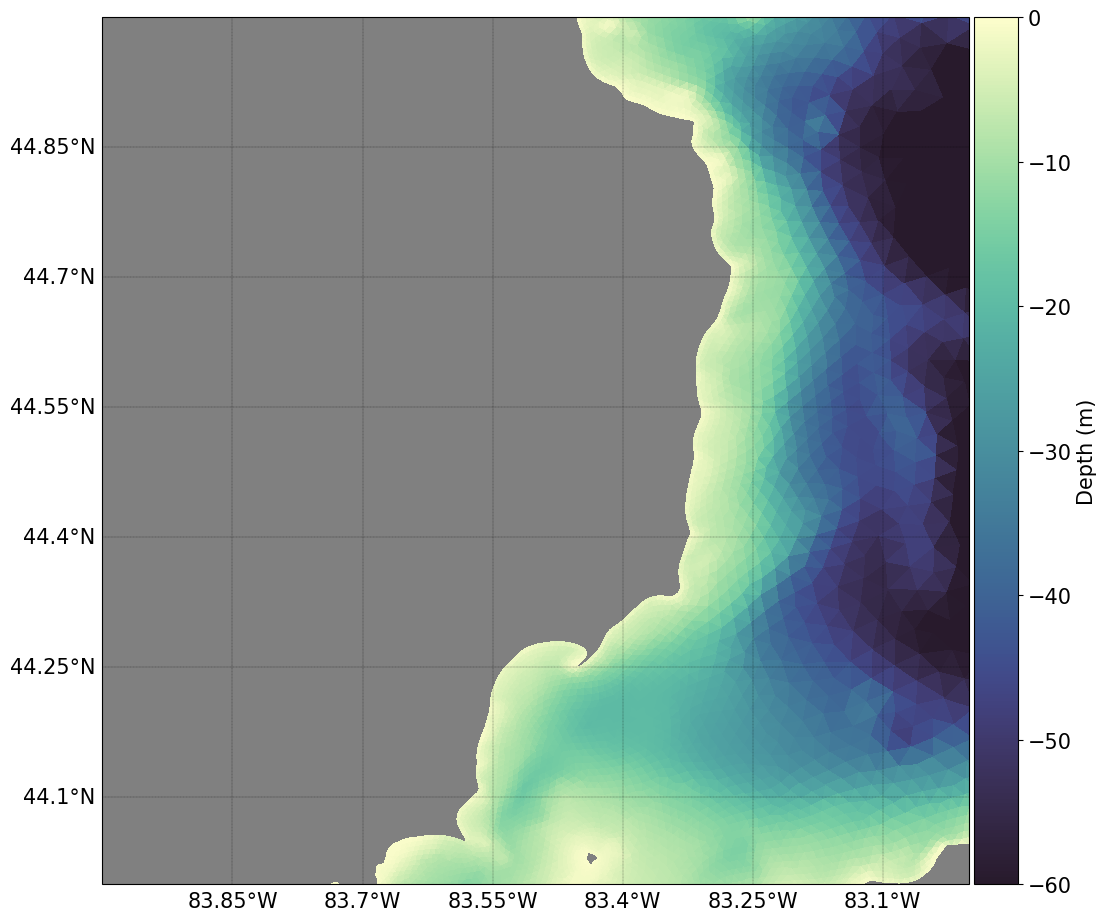

In [104]:
#required imports
from datetime import timedelta
from pylag.processing.ncview import Viewer
from netCDF4 import Dataset
from pylag.processing.plot import create_figure, colourmap
#############################################################

for file_name in sorted(filter (lambda x : x.endswith("nc"),os.listdir('/home/samin/data/FVCOME_OUTPUT/simulations/horon/output/moredata')),key= lambda x : int(x.split(".")[0].split("_")[1])):
    sample_name = file_name
    file_name = '/home/samin/data/FVCOME_OUTPUT/simulations/horon/output/moredata/' + file_name 
    
    ds = Dataset(grid_metrics_file_name, 'r')
    bathy = -ds.variables['h'][:]
    cmap = colourmap('h_r')
    # Time of flight
    time_of_flight = timedelta(hours=24)
    font_size = 15
    # Plot extents
    extents = np.array([276, 277, 44, 45], dtype=float)
    #276.5, 276.8, 44.7, 44.85
    #extents = np.array([-145, 245, 40, 46.4], dtype=float)
    fig, ax = create_figure(figure_size=(30., 30.), projection=ccrs.PlateCarree(),
                            font_size=font_size, bg_color='gray')
    
    # Configure plotter
    plotter = FVCOMPlotter(grid_metrics_file_name,
                           geographic_coords=True,
                           font_size=font_size)
    
    # Plot the bathymetry again. We'll overlay pathlines on top of this.
    plotter.plot_field(ax, bathy, extents= extents, add_colour_bar=True, cb_label='Depth (m)',
                       vmin=-60., vmax=0., cmap=cmap)
    
    # Dataset holding particle positions
    viewer = Viewer(file_name, time_rounding=900)
    
    # Get time index
    date = viewer.date[0] + time_of_flight
    time_index = viewer.date.tolist().index(date)
    n_times = viewer.date[:time_index+1].shape[0]
    
    # Convert positions into lons/lats
    lons,lats = [viewer('longitude')[time_index,:].squeeze(), viewer('latitude')[time_index, :].squeeze()]
    
    # Plot particle final positions
    ax, scatter = plotter.scatter(ax, lons, lats, s=8, color='#e50000', edgecolors='none')
    
    # Convert all pathline coordinates into lons/lats
    #for i in range(0,60):
        #lons_paths, lats_paths = (viewer('longitude')[:i+1, :],
                                       # viewer('latitude')[:i+1, :])
    lons_paths, lats_paths = (viewer('longitude')[:time_index+1, :],
                                             viewer('latitude')[:time_index+1, :])
    # Add path lines
    ax, lines = plotter.plot_lines(ax, lons_paths, lats_paths, linewidth=0.10, alpha=1, color='#0504aa')
    output_directory = '/home/samin/data/figs/new_results/'
    plt.savefig(output_directory+sample_name.split(".")[0]+ ".png",dpi=300)
        